In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression

In [6]:
df=pd.read_csv("/content/crime_rate_child_india (1).csv")


In [7]:
df.columns.values[0]="state"
df.columns.values[1]="crime"
df.columns.values[2:] = "count"+df.columns.values[2:] 

In [10]:
raw = pd.wide_to_long(df,stubnames = "count", i=["state", "crime"], j="year").reset_index(drop=False)


In [11]:
data = raw[~(raw.state.str.contains("TOTAL")|raw.crime.str.contains("TOTAL"))]


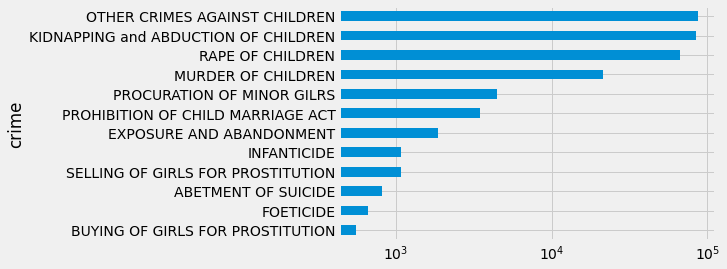

In [13]:
total_crimes = data.groupby("crime")["count"].sum().sort_values()
total_crimes
total_crimes.plot(kind="barh", logx=True)

In [14]:
total_state = data.groupby("state")["count"].sum().sort_values()
total_state

state
LAKSHADWEEP              1
DAMAN & DIU             44
NAGALAND                60
D & N HAVELI           103
ARUNACHAL PRADESH      205
PUDUCHERRY             245
SIKKIM                 260
A & N ISLANDS          305
MIZORAM                335
MANIPUR                356
JAMMU & KASHMIR        357
MEGHALAYA              447
CHANDIGARH             625
UTTARAKHAND            879
GOA                    909
TRIPURA                932
JHARKHAND             1249
ASSAM                 1614
HIMACHAL PRADESH      2027
ODISHA                2283
KARNATAKA             2962
HARYANA               4719
PUNJAB                5023
TAMIL NADU            5830
WEST BENGAL           6051
RAJASTHAN             7229
KERALA                7912
DELHI                10655
BIHAR                12038
GUJARAT              12075
CHHATTISGARH         15203
ANDHRA PRADESH       18407
MAHARASHTRA          35351
MADHYA PRADESH       58329
UTTAR PRADESH        58575
Name: count, dtype: int64

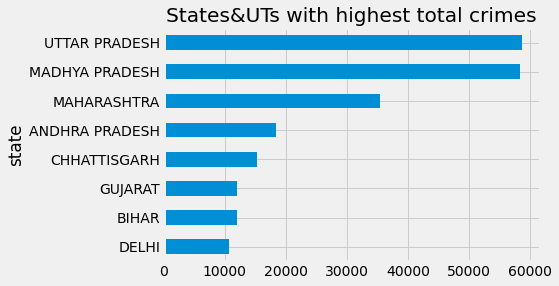

In [16]:
total_state.tail(8).plot(kind="barh", title = "States&UTs with highest total crimes")


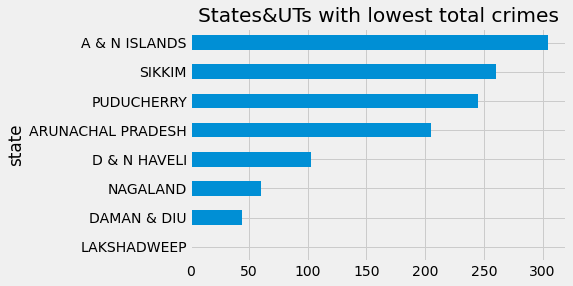

In [17]:
total_state.head(8).plot(kind="barh", title = "States&UTs with lowest total crimes")

In [18]:
uts = ['CHANDIGARH','A & N ISLANDS','D & N HAVELI', 'DAMAN & DIU','DELHI', 'LAKSHADWEEP','PUDUCHERRY']


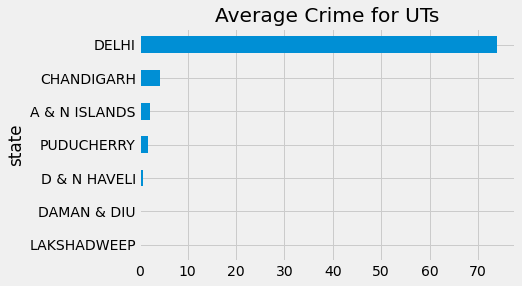

In [20]:
# Average Crimes / State & UT
data[data.state.isin(uts)].groupby("state")["count"].mean().sort_values().plot(kind="barh", title = "Average Crime for UTs")


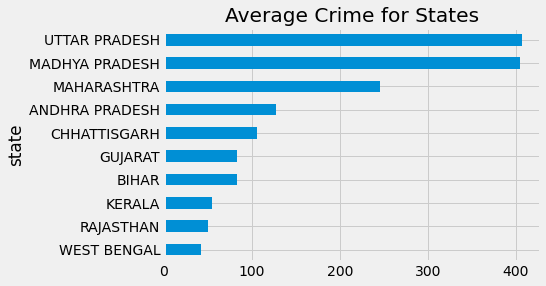

In [21]:
data[~data.state.isin(uts)].groupby("state")["count"].mean().sort_values().tail(10).plot(kind="barh", title = "Average Crime for States")

In [22]:
# Selecting only top 5 crimes, except the "other crimes". checking contribution of these crimes through the years
crimestack = data[data.crime.isin(list(total_crimes.index)[-7:-1])].groupby(["year","crime"])["count"].sum().unstack()
crimestack



crime,EXPOSURE AND ABANDONMENT,KIDNAPPING and ABDUCTION OF CHILDREN,MURDER OF CHILDREN,PROCURATION OF MINOR GILRS,PROHIBITION OF CHILD MARRIAGE ACT,RAPE OF CHILDREN
year,,,,,,
2001,167,3335,1482,198,281,2695
2002,153,2575,1305,204,475,2806
2003,161,3035,1531,174,224,3423
2004,138,3863,1685,187,335,4233
2005,158,4049,1506,154,411,4636
2006,192,4888,1725,298,305,5489
2007,196,6104,1849,287,221,5756
2008,163,8066,1822,292,287,6363
2009,141,8112,1943,337,2,6308


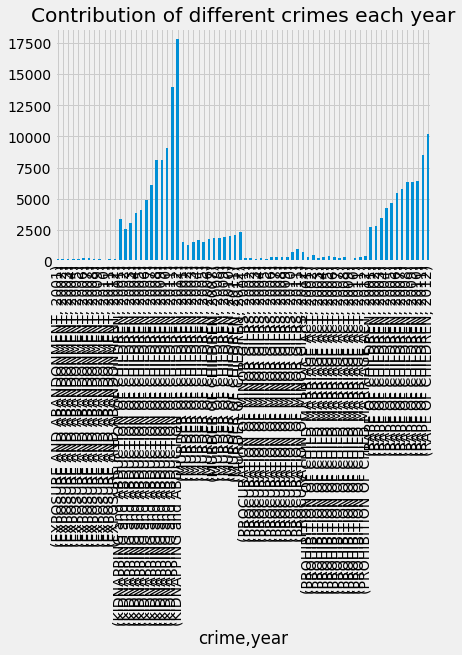

In [23]:
crimestack.unstack().plot(kind="bar", stacked=True, title = "Contribution of different crimes each year")

In [24]:
crimeline = data[data.crime.isin(list(total_crimes.index)[-6:-1])].groupby(["year","crime"])["count"].mean().unstack()
crimeline 

crime,KIDNAPPING and ABDUCTION OF CHILDREN,MURDER OF CHILDREN,PROCURATION OF MINOR GILRS,PROHIBITION OF CHILD MARRIAGE ACT,RAPE OF CHILDREN
year,,,,,
2001,95.285714,42.342857,5.657143,8.028571,77.000000
2002,73.571429,37.285714,5.828571,13.571429,80.171429
2003,86.714286,43.742857,4.971429,6.400000,97.800000
2004,110.371429,48.142857,5.342857,9.571429,120.942857
2005,115.685714,43.028571,4.400000,11.742857,132.457143
2006,139.657143,49.285714,8.514286,8.714286,156.828571
2007,174.400000,52.828571,8.200000,6.314286,164.457143
2008,230.457143,52.057143,8.342857,8.200000,181.800000
2009,231.771429,55.514286,9.628571,0.057143,180.228571


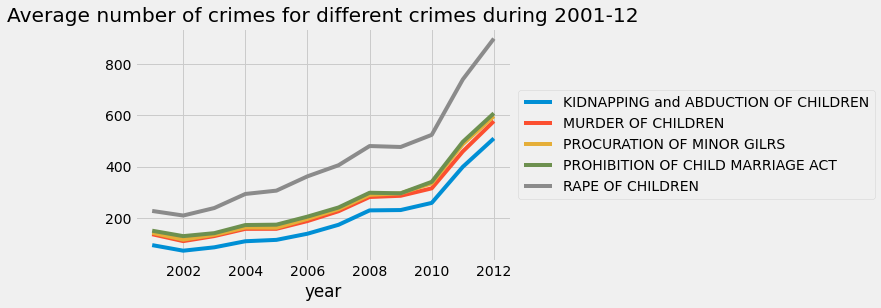

In [26]:
crimeline.plot(kind="line", stacked=True, title = "Average number of crimes for different crimes during 2001-12")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

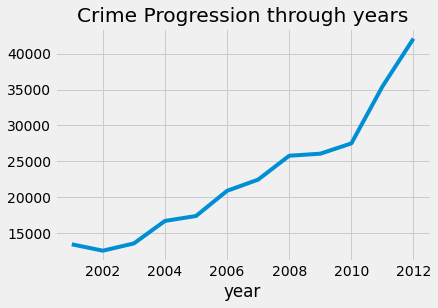

In [27]:
data.groupby("year")["count"].sum().plot(title="Crime Progression through years")

In [35]:
agg = data.groupby("year")["count"].sum().reset_index(drop=False)
agg

,year,count
0,2001,13401
1,2002,12507
2,2003,13524
3,2004,16663
4,2005,17353
5,2006,20870
6,2007,22432
7,2008,25766
8,2009,26050
9,2010,27485


In [47]:
def model(agg):
  X = agg[["year"]]
  y = agg[["count"]]
  reg = LinearRegression()
  reg.fit(X,y)
  plt.scatter(X, y, color = 'blue')
  plt.plot(X, reg.predict(X), color = 'red')
    
  return(plt.show(),reg.predict(pd.DataFrame([2013], columns=["year"])))

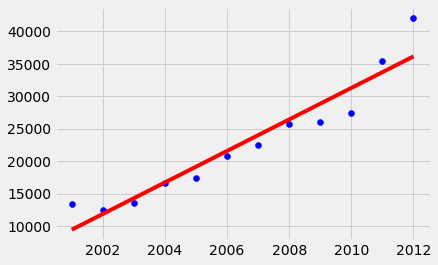

(None, array([[38563.65151515]]))

In [48]:
model(agg)

In [50]:
l = ["Low"]*12; m = ["Med"]*12; h = ["High"]*11
state_dict = total_state.reset_index().assign(cat= l+m+h).\
drop("count", axis=1).set_index('state')["cat"].to_dict()

In [51]:
ml_data = data.replace({'state': state_dict}).groupby(["year","state"])["count"].sum().reset_index()

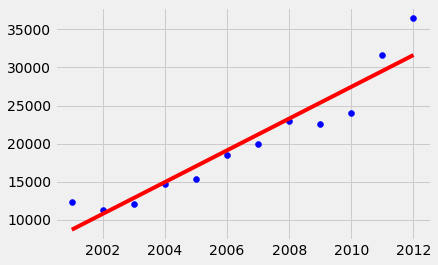

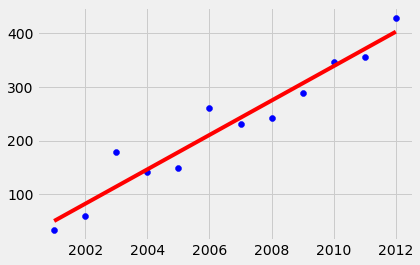

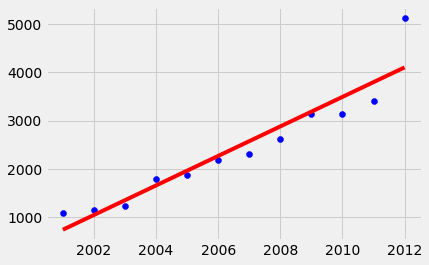

state
High    (None, [[33724.060606061015]])
Low     (None, [[434.77272727272793]])
Med      (None, [[4404.818181818235]])
dtype: object

In [52]:
ml_data.groupby('state').apply(model)

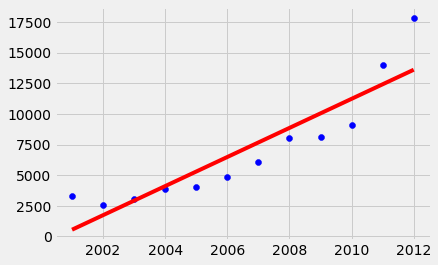

(None, array([[14795.31818182]]))

In [54]:
model(data[data.crime=="KIDNAPPING and ABDUCTION OF CHILDREN"].groupby("year")["count"].sum().reset_index())


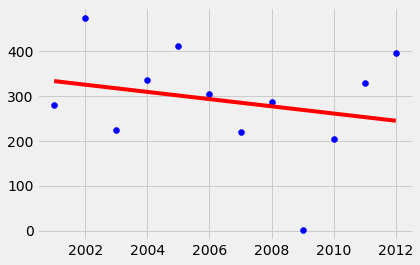

(None, array([[237.]]))

In [55]:
model(data[data.crime=="PROHIBITION OF CHILD MARRIAGE ACT"].groupby("year")["count"].sum().reset_index())


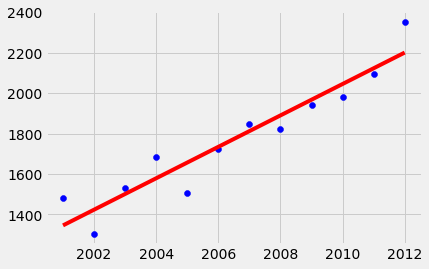

(None, array([[2277.6969697]]))

In [56]:
model(data[data.crime=="MURDER OF CHILDREN"].groupby("year")["count"].sum().reset_index())